# PGC - Processamento e Análise Exploratória

In [1]:
import datetime
import statistics
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact

pd.set_option('max_columns',None)
pd.set_option('max_rows',None)

In [2]:
params = {'figure.figsize': [10,10],
          'axes.labelsize': 16,
          'axes.titlesize':18,
          'font.size': 16,
          'legend.fontsize': 12,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12,
          'figure.autolayout': True
    }

plt.rcParams.update(params)

Importando e exibindo base de dados.

In [3]:
df = pd.read_excel("../Dados/dataset.xlsx")

print(df.tail())

                                           Post       Data  \
150                           O futuro da carne 2020-08-31   
151              Amazônia: fatos e curiosidades 2020-09-05   
152      O que está acontecendo com os insetos? 2020-09-14   
153  Perigos na mistura de produtos de limpeza! 2020-09-21   
154   Qual a diferença entre rinite e sinusite? 2020-09-28   

                    Categoria      Área  Título Representativo  Mídia  SEO  \
150  O que que a ciência tem?  Biologia                      0      1    1   
151          Ciência ao redor  Biologia                      1      2    1   
152          Ciência ao redor  Biologia                      1      3    1   
153          Ciência ao redor   Química                      1      1    1   
154  O que que a ciência tem?  Medicina                      1      1    1   

     Links I.  Links E.  Complexidade  Introdução  Analogias  Interação  \
150         0        12             1           1          0          1   
151     

Removendo atributo 'Data' e criando atributo 'Dias' com o número de dias desde a publicação até a coleta dos dados.

In [4]:
dt = datetime.datetime(year=2020,month=11,day=1, hour=0, minute=0, second=0, microsecond=0, tzinfo=None, fold=0)
# 2020-11-01 00:00:00

dias = []

for i in range(df['Data'].size):
    dias.append((dt - df['Data'][i]).days)

print("Dias desde a publicação:\n", dias)

df['Dias'] = dias
df.drop('Data',axis=1,inplace=True)

Dias desde a publicação:
 [879, 871, 870, 867, 839, 837, 834, 832, 830, 829, 828, 827, 825, 823, 820, 818, 816, 813, 811, 808, 804, 801, 797, 794, 790, 787, 783, 780, 776, 773, 769, 766, 762, 759, 755, 752, 748, 745, 741, 738, 737, 734, 731, 727, 717, 713, 706, 699, 677, 671, 671, 664, 657, 650, 643, 636, 629, 622, 615, 601, 594, 590, 587, 581, 575, 573, 566, 563, 559, 552, 549, 545, 539, 531, 524, 517, 510, 503, 497, 491, 489, 482, 475, 470, 468, 461, 454, 447, 440, 433, 426, 419, 412, 405, 398, 391, 388, 384, 377, 370, 363, 356, 349, 342, 335, 328, 321, 314, 307, 306, 300, 293, 286, 279, 272, 265, 258, 251, 244, 237, 230, 223, 216, 209, 202, 200, 198, 195, 193, 191, 188, 186, 181, 174, 167, 160, 153, 146, 139, 132, 126, 125, 118, 111, 104, 97, 90, 83, 76, 69, 62, 57, 48, 41, 34]


Número de publicações por categoria.

In [5]:
df.groupby('Categoria').count()[['Post']].sort_values(by=['Post'], ascending=0)

,Post
Categoria,
Ciência ao redor,54
O que que a ciência tem?,49
Profissão Cientista,17
Ciência Pop,10
Sci… what?,10
Outros,8
ABC da ciência,4
Você disse ciência?,3


Número de publicações por área.

In [6]:
df.groupby('Área').count()[['Post']].sort_values(by=['Post'], ascending=0)

,Post
Área,
Biologia,29
Ciência,24
Química,23
Física,21
Medicina,15
História,14
Astronomia,8
Atualidades,7
Matemática,7


Exibindo publicações com o número de visualizações, tamanho médio dos parágrafos, tamanho do título, número de palavras e número de parágrafos maior que determinado valor.

In [7]:
@interact
def exibir_df(Coluna=['Visualizações','tamMedioParagraf','tamTitulo','numPal','numPar'], Valor=(0,5000,10)):
    return df.loc[df[Coluna] > Valor]

interactive(children=(Dropdown(description='Coluna', options=('Visualizações', 'tamMedioParagraf', 'tamTitulo'…

Exibindo um gráfico de dispersão com três colunas selecionadas.

In [8]:
@interact
def scatter_plot(X=list(df.select_dtypes('number').columns),
                 Y=list(df.select_dtypes('number').columns),
                 HUE=list(df.select_dtypes('number').columns),
                 size=(0,15,1)):
    plt.figure(figsize=(size,size))
    sns.lmplot(x=X, 
               y=Y, 
               hue=HUE, 
               data=df, 
               height=size, 
               legend_out=False, 
               truncate=True)
    plt.grid()

interactive(children=(Dropdown(description='X', options=('Título Representativo', 'Mídia', 'SEO', 'Links I.', …

Cálculo dos quartis, da amplitude interquartil e dos limites superior e inferior.

In [9]:
Q1, Q3 = np.percentile(df['Visualizações'], [25, 75])
print('Primeiro quartil ou percentil 25:',Q1)
print('Terceiro quartil ou percentil 75:',Q3)

amplitude_interquartil = Q3 - Q1
print('Amplitude interquartil:',amplitude_interquartil)

limite_inferior = Q1 - (1.5 * amplitude_interquartil)
limite_superior = Q3 + (1.5 * amplitude_interquartil)
print('Limite Inferior:',limite_inferior )
print('Limite Superior:',limite_superior )

Primeiro quartil ou percentil 25: 198.5
Terceiro quartil ou percentil 75: 794.5
Amplitude interquartil: 596.0
Limite Inferior: -695.5
Limite Superior: 1688.5


Exibindo e removendo publicações com número de visualizações acima do limite superior.

In [10]:
df_temp = df[df["Visualizações"] > limite_superior]
df_temp.reset_index(inplace=True, drop=True)
df_temp

,Post,Categoria,Área,Título Representativo,Mídia,SEO,Links I.,Links E.,Complexidade,Introdução,Analogias,Interação,Siglas,Visualizações,numPal,numPar,numSub,numAdj,numVrb,numNEs,numDet,numConj,numAdv,numAdp,numNum,pergunta,tamMedioParagraf,tamTitulo,refs,Dias
0,"A ciência que você vê, mas não percebe!",Ciência ao redor,Ciência,1,2,1,0,5,1,1,1,1,1,2375,449,10,0.3007,0.0601,0.1359,0.0312,0.1960,0.0423,0.0379,0.0980,0.0000,0,335,39,15,818
1,Todo remédio é uma droga?,O que que a ciência tem?,Medicina,1,1,1,0,1,2,1,0,1,1,2392,292,7,0.3699,0.0685,0.0856,0.0685,0.1781,0.0582,0.0582,0.1096,0.0068,1,387,25,4,769
2,O que é água alcalina?,Você disse ciência?,Química,1,1,1,0,9,2,1,0,1,1,1880,691,11,0.2836,0.0912,0.1071,0.0101,0.1737,0.0434,0.0535,0.1056,0.0130,1,443,22,7,727
3,O que (não) é quântica!,Você disse ciência?,Física,1,1,1,0,15,2,1,0,1,1,2939,1044,14,0.2912,0.0987,0.1140,0.0335,0.1695,0.0460,0.0479,0.1207,0.0067,0,555,23,5,706
4,Resenha – O menino que descobriu o vento,Ciência Pop,Ciência,1,1,1,0,5,1,1,0,0,1,12412,443,11,0.3002,0.0835,0.1151,0.0248,0.2032,0.0384,0.0609,0.0903,0.0023,0,302,40,2,563
5,A quantos graus ferve a água?,Ciência ao redor,Física,1,1,1,0,11,2,1,0,1,1,9395,706,10,0.3272,0.0652,0.1176,0.0708,0.1898,0.0326,0.0496,0.1218,0.0142,1,545,29,4,559
6,"Se o homem foi à Lua em 1969, por que nunca vo...",Ciência ao redor,Astronomia,1,7,1,0,11,2,1,0,1,1,2389,1452,25,0.3815,0.0627,0.0950,0.1935,0.1742,0.0372,0.0461,0.0999,0.0234,1,368,51,1,470
7,Por que usamos “cloro” (ou água sanitária) par...,Ciência ao redor,Química,1,1,1,0,5,2,1,0,1,1,2348,779,9,0.2991,0.0834,0.1168,0.0321,0.1579,0.0436,0.0591,0.1271,0.0013,1,685,68,2,335
8,O que acontece no seu corpo após tomar aquela ...,Ciência ao redor,Química,1,1,0,0,8,2,1,0,1,1,4547,934,15,0.3137,0.0771,0.1167,0.0118,0.1959,0.0418,0.0385,0.1049,0.0182,1,426,61,2,328
9,Os barulhos no céu!,Ciência ao redor,Física,1,1,1,0,4,1,1,0,1,1,1760,654,7,0.3180,0.0688,0.1239,0.0826,0.1682,0.0321,0.0719,0.1086,0.0138,0,811,19,0,195


Exibindo boxplot com outliers.

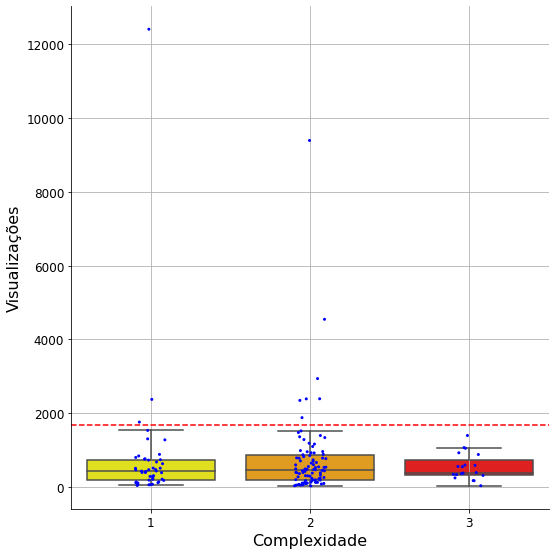

In [11]:
sns.catplot(x='Complexidade', 
            y='Visualizações', 
            kind='box', 
            data=df, 
            height=8, 
            palette=['yellow','orange','red'], 
            showfliers = False)

sns.stripplot(x='Complexidade', 
              y="Visualizações", 
              data=df, 
              color="blue", 
              size=3);

plt.plot([-0.5,2.5], [limite_superior,limite_superior], color='red', linestyle='--')
plt.tight_layout()
plt.grid()
#plt.savefig("../Imagens/boxplot1.png")

Removendo outliers e exibindo novo boxplot.

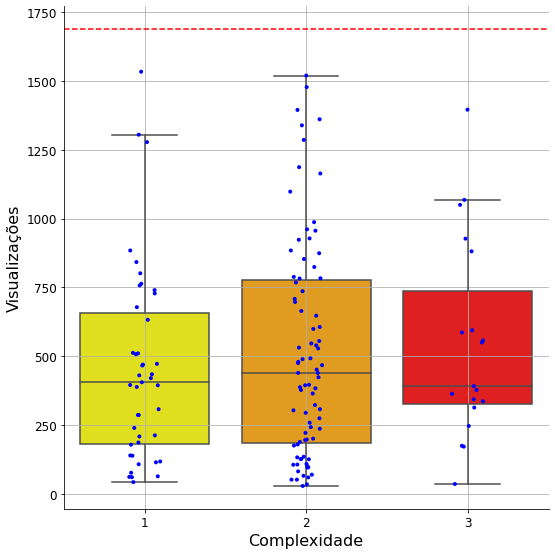

In [12]:
df_outlier = df.drop(df[df.Visualizações > limite_superior].index)

sns.catplot(x='Complexidade', y='Visualizações', kind='box', data=df_outlier, height=8, palette=['yellow','orange','red'], showfliers = False)
sns.stripplot(x='Complexidade', y="Visualizações", data=df_outlier, color="blue", size=4);
plt.plot([-0.5,2.5], [limite_superior,limite_superior], color='red', linestyle='--')
plt.tight_layout()
plt.grid()
#plt.savefig("boxplot2.png")

Removendo o atributo 'Post'.

In [13]:
df_outlier.drop('Post',axis=1,inplace=True)

Aplicando One-Hot Encoding aos atributos 'Categoria' e 'Área'.

In [14]:
df_ohe = pd.get_dummies(df_outlier,
                            prefix=['categoria','área'],
                            prefix_sep='-',
                            columns=['Categoria','Área'])
df_ohe

,Título Representativo,Mídia,SEO,Links I.,Links E.,Complexidade,Introdução,Analogias,Interação,Siglas,Visualizações,numPal,numPar,numSub,numAdj,numVrb,numNEs,numDet,numConj,numAdv,numAdp,numNum,pergunta,tamMedioParagraf,tamTitulo,refs,Dias,categoria-ABC da ciência,categoria-Ciência Pop,categoria-Ciência ao redor,categoria-O que que a ciência tem?,categoria-Outros,categoria-Profissão Cientista,categoria-Sci… what?,categoria-Você disse ciência?,área-Astronomia,área-Atualidades,área-Biologia,área-Ciência,área-Física,área-História,área-Matemática,área-Medicina,área-Psicologia,área-Química,área-Tecnologia
0,1,1,0,0,2,1,1,0,1,1,466,345,9,0.3362,0.0754,0.1159,0.1420,0.1594,0.0406,0.0464,0.0899,0.0116,1,308,40,15,879,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1,2,1,0,3,1,1,0,1,0,307,532,18,0.3684,0.0752,0.1034,0.1673,0.1729,0.0489,0.0169,0.1222,0.0132,0,204,22,17,871,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,7,1,0,28,2,1,1,1,0,961,913,33,0.3395,0.0537,0.1544,0.1249,0.1796,0.0372,0.0482,0.0832,0.0175,1,180,65,8,870,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,1,1,0,3,2,1,1,1,0,423,322,6,0.3758,0.0528,0.1273,0.0590,0.1584,0.0435,0.0373,0.1335,0.0124,0,514,20,5,867,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,1,1,1,0,0,3,0,0,0,1,391,557,13,0.4022,0.0772,0.0790,0.1598,0.1544,0.0395,0.0305,0.1472,0.0180,0,340,56,5,839,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
5,0,1,1,0,8,2,1,1,1,0,258,400,9,0.2825,0.0650,0.1525,0.0575,0.1650,0.0275,0.0475,0.1225,0.0400,0,332,32,6,837,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
6,1,1,1,0,3,3,1,0,1,1,1396,400,7,0.3600,0.0650,0.1275,0.0500,0.1600,0.0375,0.0300,0.1250,0.0000,1,472,36,8,834,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,1,1,1,0,7,3,0,0,0,1,881,345,7,0.2957,0.0406,0.1623,0.0348,0.1681,0.0406,0.0377,0.1072,0.0203,1,384,52,2,832,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,1,1,0,0,0,3,1,1,1,0,1050,577,9,0.3016,0.0503,0.1404,0.0225,0.2132,0.0312,0.0416,0.1075,0.0000,1,478,31,4,830,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9,1,2,1,0,1,2,1,0,1,0,539,1129,20,0.3198,0.0664,0.1027,0.1302,0.1807,0.0248,0.0576,0.1160,0.0071,0,378,71,8,829,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


Analisando diferenças entre os textos cujos títulos contém perguntas e comparados aos que não têm.

In [15]:
binarios = ['Título Representativo','SEO','Introdução','Analogias','Interação','Siglas',
            'pergunta','categoria-ABC da ciência', 'categoria-Ciência Pop',
            'categoria-Ciência ao redor', 'categoria-O que que a ciência tem?',
            'categoria-Outros', 'categoria-Profissão Cientista',
            'categoria-Sci… what?', 'categoria-Você disse ciência?',
            'área-Astronomia', 'área-Atualidades', 'área-Biologia', 'área-Ciência',
            'área-Física', 'área-História', 'área-Matemática', 'área-Medicina',
            'área-Psicologia', 'área-Química', 'área-Tecnologia']
df_0 = []
df_1 = []
i = 0

coluna_atributo = []
coluna_zeros = []
coluna_ones = []

atributos_95 = []

for i in range(len(binarios)):
    zeros = df_ohe.loc[df_ohe[binarios[i]]==0]
    ones = df_ohe.loc[df_ohe[binarios[i]]==1]
    qtde_zeros = len(zeros)
    qtde_ones = len(ones)
    
    df_1.append(list(ones.copy()['Visualizações']))
    df_0.append(list(zeros.copy()['Visualizações']))
    
    if(qtde_zeros < len(df_ohe)/20 or qtde_ones < len(df_ohe)/20):
        print(f"O atributo {binarios[i]} tem 95%+ de valores iguais.\n")
        atributos_95.append(binarios[i])
    else:
        print(f"Média para {len(zeros)} textos com {binarios[i]} = 0: {round(statistics.mean(df_0[i]))} visualizações.")
        print(f"Média para {len(ones)} textos com {binarios[i]} = 1: {round(statistics.mean(df_1[i]))} visualizações.\n")
        coluna_atributo.append(binarios[i])
        coluna_zeros.append(round(statistics.mean(df_0[i])))
        coluna_ones.append(round(statistics.mean(df_1[i])))

Média para 13 textos com Título Representativo = 0: 451 visualizações.
Média para 132 textos com Título Representativo = 1: 502 visualizações.

Média para 18 textos com SEO = 0: 583 visualizações.
Média para 127 textos com SEO = 1: 486 visualizações.

Média para 15 textos com Introdução = 0: 504 visualizações.
Média para 130 textos com Introdução = 1: 497 visualizações.

Média para 122 textos com Analogias = 0: 478 visualizações.
Média para 23 textos com Analogias = 1: 603 visualizações.

Média para 33 textos com Interação = 0: 482 visualizações.
Média para 112 textos com Interação = 1: 502 visualizações.

Média para 27 textos com Siglas = 0: 465 visualizações.
Média para 118 textos com Siglas = 1: 505 visualizações.

Média para 88 textos com pergunta = 0: 426 visualizações.
Média para 57 textos com pergunta = 1: 608 visualizações.

O atributo categoria-ABC da ciência tem 95%+ de valores iguais.

Média para 136 textos com categoria-Ciência Pop = 0: 503 visualizações.
Média para 9 texto

In [16]:
print("Ficam de fora:",atributos_95)

medias = pd.DataFrame()
medias['Atributos'] = coluna_atributo
medias['Média False'] = coluna_zeros
medias['Média True'] = coluna_ones
medias.sort_values(by='Média True', ascending=False, inplace=True)
medias.reset_index(inplace=True, drop=True)
medias.to_excel('../Dados/medias-binarias.xlsx', index = False, sheet_name='Sheet1')
medias

Ficam de fora: ['categoria-ABC da ciência', 'categoria-Você disse ciência?', 'área-Astronomia', 'área-Atualidades', 'área-Matemática', 'área-Psicologia', 'área-Tecnologia']


,Atributos,Média False,Média True
0,área-Física,470,690
1,pergunta,426,608
2,Analogias,478,603
3,categoria-O que que a ciência tem?,462,569
4,área-Química,489,554
5,categoria-Ciência ao redor,476,542
6,área-Medicina,494,530
7,área-Ciência,493,521
8,Siglas,465,505
9,Interação,482,502


In [17]:
@interact
def scatter_plot(X=list(df_ohe.columns),
                 Y=list(df_ohe.columns),
                 HUE=list(df_ohe.columns),
                 size=(0,15,1)):
    plt.figure(figsize=(size,size))
    sns.lmplot(x=X, y=Y, hue=HUE, data=df_ohe, height=size, legend_out=False)
    plt.grid()
    plt.savefig(f"../Imagens/Gráfico {X}-{Y}-{HUE}.pdf")

interactive(children=(Dropdown(description='X', options=('Título Representativo', 'Mídia', 'SEO', 'Links I.', …

In [18]:
@interact
def scatter_plot(X=list(df_ohe.select_dtypes('number').columns),
                 Y=list(df_ohe.select_dtypes('number').columns),
                 size=(0,15,1)):
    corr = str(df_ohe[X].corr(df_ohe[Y]))
    print(f'Correlação entre os atributos: {corr}')

interactive(children=(Dropdown(description='X', options=('Título Representativo', 'Mídia', 'SEO', 'Links I.', …

In [19]:
corr = df_ohe.corr()

In [20]:
numericos = ['Mídia','Links I.','Links E.','numPal', 'numPar', 'numSub', 'numAdj',
             'numVrb','numNEs', 'numDet', 'numConj', 'numAdv', 'numAdp', 'numNum',
             'tamMedioParagraf', 'tamTitulo', 'refs', 'Dias']

correlacoes = []
atributos = []

for i in range(len(numericos)):
    atributos.append(numericos[i])
    correlacoes.append(round(corr['Visualizações'][numericos[i]],3))

correlacao = pd.DataFrame()
correlacao['Atributos'] = atributos
correlacao['Correlação x Visualizações'] = correlacoes
correlacao.sort_values(by='Correlação x Visualizações', inplace=True)
correlacao.reset_index(inplace=True, drop=True)
correlacao.to_excel('../Dados/correlacao-atributo-visualizacoes.xlsx', index = False, sheet_name='Sheet1')
correlacao

,Atributos,Correlação x Visualizações
0,numNEs,-0.155
1,numAdp,-0.146
2,tamMedioParagraf,-0.123
3,numPal,-0.118
4,tamTitulo,-0.096
5,numConj,-0.063
6,numSub,-0.062
7,numNum,-0.056
8,numAdv,-0.044
9,Mídia,-0.020


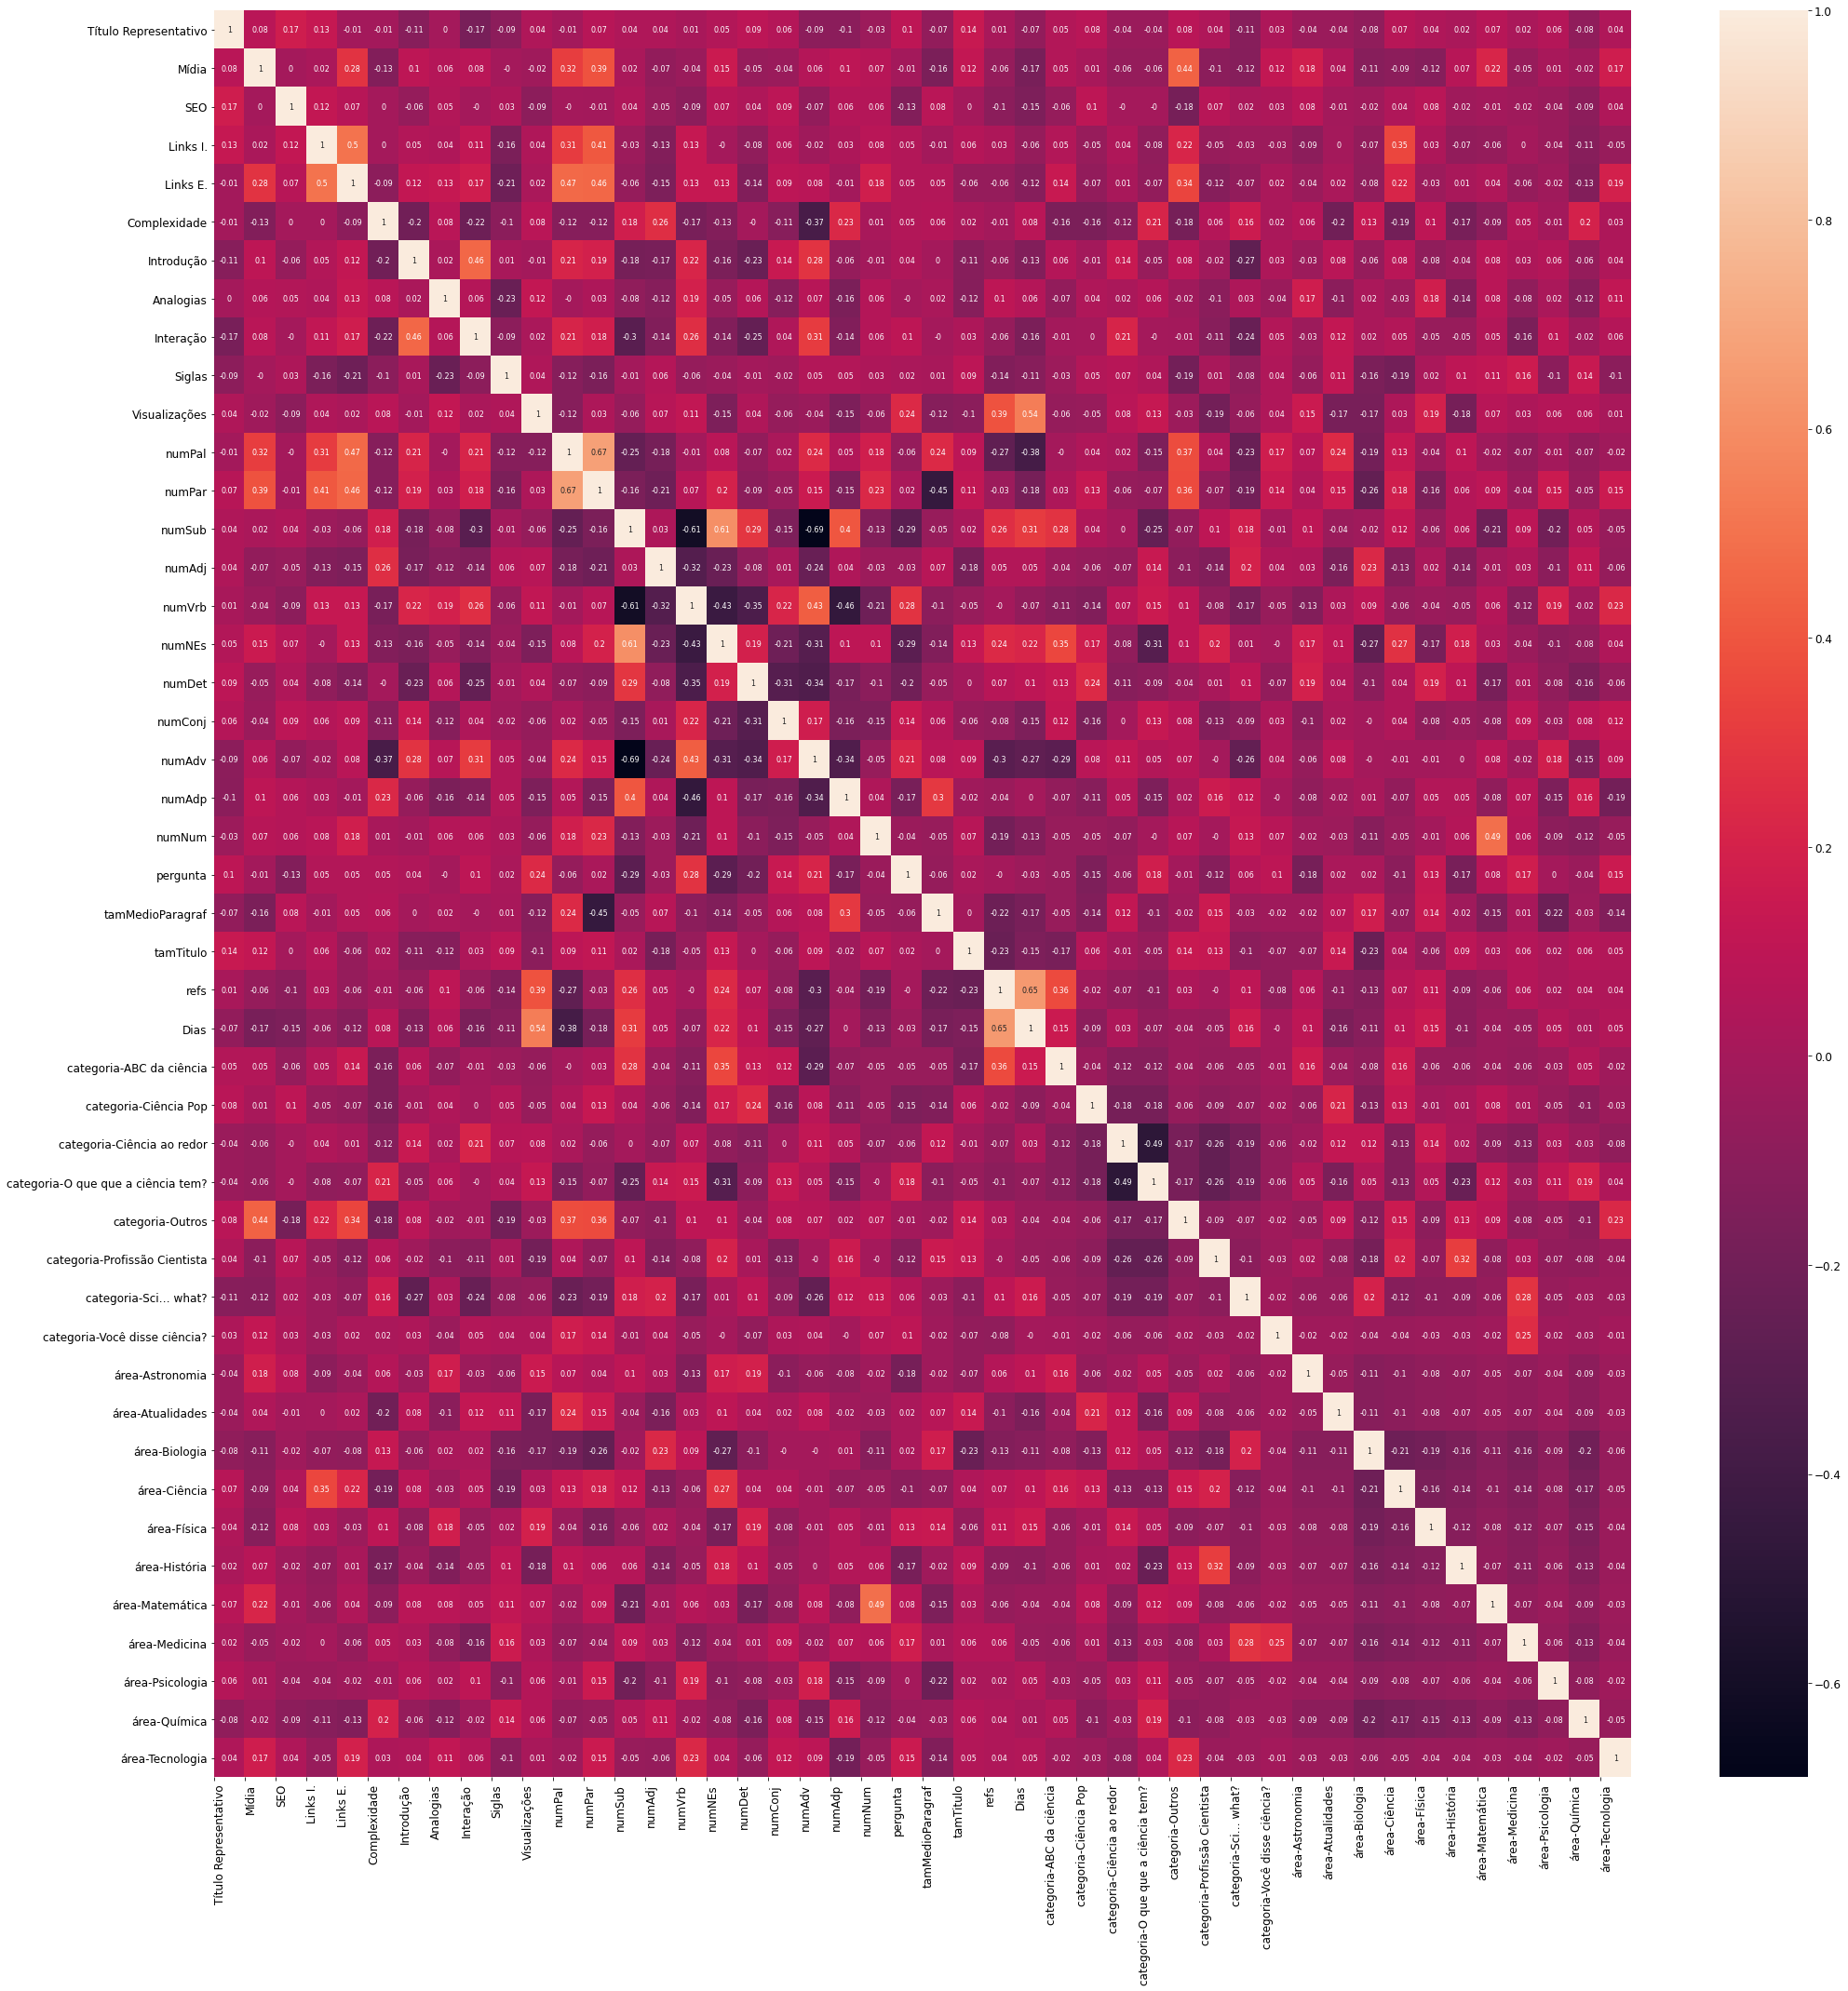

In [21]:
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(round(corr,2), annot=True, annot_kws={'fontsize':8})
kwargs = {'ha':'left'};
plt.xticks(range(len(corr)), corr.columns, rotation=90, **kwargs);
plt.savefig('../Imagens/correl.pdf')

In [22]:
df_ohe.to_excel('../Dados/dataset-processed.xlsx', index = False)

In [23]:
df_ohe.describe()

,Título Representativo,Mídia,SEO,Links I.,Links E.,Complexidade,Introdução,Analogias,Interação,Siglas,Visualizações,numPal,numPar,numSub,numAdj,numVrb,numNEs,numDet,numConj,numAdv,numAdp,numNum,pergunta,tamMedioParagraf,tamTitulo,refs,Dias,categoria-ABC da ciência,categoria-Ciência Pop,categoria-Ciência ao redor,categoria-O que que a ciência tem?,categoria-Outros,categoria-Profissão Cientista,categoria-Sci… what?,categoria-Você disse ciência?,área-Astronomia,área-Atualidades,área-Biologia,área-Ciência,área-Física,área-História,área-Matemática,área-Medicina,área-Psicologia,área-Química,área-Tecnologia
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,0.910345,1.731034,0.875862,0.427586,7.400000,1.834483,0.896552,0.158621,0.772414,0.813793,497.606897,744.317241,13.448276,0.309550,0.074892,0.120017,0.060980,0.167232,0.039277,0.053621,0.115381,0.015660,0.393103,435.165517,42.082759,2.917241,486.841379,0.027586,0.062069,0.331034,0.331034,0.055172,0.117241,0.068966,0.006897,0.048276,0.048276,0.200000,0.151724,0.124138,0.096552,0.048276,0.096552,0.034483,0.137931,0.013793
std,0.286677,1.604054,0.330882,1.039129,8.149131,0.634799,0.305599,0.366588,0.420727,0.390623,375.159786,341.623833,6.466721,0.036092,0.018613,0.021365,0.044759,0.020899,0.009853,0.015433,0.018468,0.013398,0.490133,149.329102,16.898185,2.945108,257.701746,0.164352,0.242117,0.472217,0.472217,0.229108,0.322823,0.254274,0.083045,0.215092,0.215092,0.401386,0.359997,0.330882,0.296370,0.215092,0.296370,0.183098,0.346023,0.117036
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,28.000000,203.000000,6.000000,0.199200,0.040600,0.075600,0.004600,0.101800,0.016900,0.015200,0.063000,0.000000,0.000000,146.000000,7.000000,0.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,0.000000,1.000000,1.000000,188.000000,511.000000,9.000000,0.286700,0.061500,0.105800,0.024600,0.154100,0.032600,0.044600,0.103400,0.007400,0.000000,320.000000,30.000000,1.000000,251.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,5.000000,2.000000,1.000000,0.000000,1.000000,1.000000,420.000000,708.000000,11.000000,0.304900,0.072400,0.116800,0.047600,0.166900,0.038800,0.053400,0.115200,0.013200,0.000000,428.000000,40.000000,2.000000,497.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,1.000000,0.000000,8.000000,2.000000,1.000000,0.000000,1.000000,1.000000,736.000000,926.000000,17.000000,0.333300,0.086100,0.132800,0.079300,0.179400,0.045300,0.062400,0.126200,0.020000,1.000000,530.000000,52.000000,5.000000,741.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,15.000000,1.000000,7.000000,55.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1534.000000,2046.000000,46.000000,0.409200,0.143300,0.182500,0.196100,0.237300,0.081000,0.086800,0.171100,0.090100,1.000000,976.000000,91.000000,17.000000,879.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1

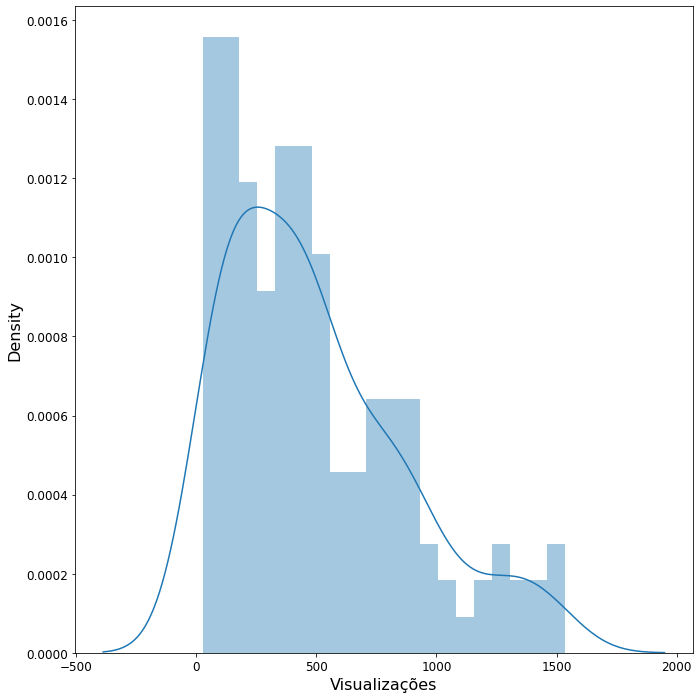

In [24]:
sns.distplot(a=df_ohe['Visualizações'], bins=20)
plt.savefig('../Imagens/histogram.pdf')